In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titaniccsv/titanic.csv
/kaggle/input/titaniccsv/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt

%matplotlib inline


from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from xgboost import XGBClassifier




from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix





from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier



from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV


from tqdm import tqdm

from sklearn.metrics import f1_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV    
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/kaggle/input/titaniccsv/titanic.csv')

test = pd.read_csv('/kaggle/input/titaniccsv/test.csv')

full_data = [train,test]

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train['Sex'] = train['Sex'].replace({'male': 1, 'female': 2})
test['Sex'] = test['Sex'].replace({'male': 1, 'female': 2})

In [6]:
#train['Fare'] = train['Fare'].fillna(train['Fare'].median())

#test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [7]:
median_fare = test[(test['Pclass'] == 3) & (test['Embarked'] == 'S')]['Fare'].median()
test["Fare"] = test["Fare"].fillna(median_fare)

In [8]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [9]:
train["Embarked"] = train["Embarked"].fillna("C")
train.isnull().sum() , test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

In [10]:
train['Cabin'] = train['Cabin'].str[0]

test['Cabin'] = test['Cabin'].str[0]

In [11]:
train['Cabin'] = train['Cabin'].replace({'nan':0,'B': 1, 'C': 2, 'D': 3,'E':4,'A':8,'F':5,'G':6,'T':7})
test['Cabin'] = test['Cabin'].replace({'nan':0,'B': 1, 'C': 2, 'D': 3,'E':4,'A':8,'F':5,'G':6,'T':7})

In [12]:
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].median())
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].median())

In [13]:
train['Embarked'] = train['Embarked'].replace({'Q':0,'S': 1, 'C': 2})
test['Embarked'] = test['Embarked'].replace({'Q':0,'S': 1, 'C': 2})

In [14]:
def get_prefix(ticket):
    """
    check if the first part of the ticket (separated by a space) are letters
    return only the letter or the information that the first part does not contain only letter
    """
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'

def ticket_features(df):
    """
    Prefix: non numerical prefix of a ticket
    TNlen: length of numeric ticket number
    LeadingDigit: first digit of numeric ticket number
    TGroup: numeric ticket number without the last digit
    """
    df['Ticket'] = df['Ticket'].replace('LINE','LINE 0')
    df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
    df['Prefix'] = df['Ticket'].apply(lambda x: get_prefix(x))
    df['TNumeric'] = df['Ticket'].apply(lambda x: int(x.split(' ')[-1]))
    df['TNlen'] = df['TNumeric'].apply(lambda x : len(str(x)))
    df['LeadingDigit'] = df['TNumeric'].apply(lambda x : int(str(x)[0]))
    df['TGroup'] = df['TNumeric'].apply(lambda x: str(x//10))

    df = df.drop(columns=['TNumeric'])

    return df

In [15]:
train = ticket_features(train)
test = ticket_features(test)

In [16]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,TNlen,LeadingDigit,TGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,a5 21171,7.2500,2.0,1,a5,5,2,2117
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,pc 17599,71.2833,2.0,2,pc,5,1,1759
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,stono2 3101282,7.9250,2.0,1,stono2,7,3,310128
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2.0,1,NoPrefix,6,1,11380
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,1,NoPrefix,6,3,37345


In [17]:
def age_category(row):
    """
    Function to transform the actual age in to an age category
    Thresholds are deduced from the distribution plot of age
    """
    if row < 12:
        return 'children'
    if (row >= 12) & (row < 60):
        return 'adult'
    if row >= 60:
        return 'senior'
    else:
        return 'no age'

# apply the function age_category to each row of the dataset
train['Age_category'] = train['Age'].apply(lambda row: age_category(row))

test['Age_category'] = test['Age'].apply(lambda row: age_category(row))



In [18]:
train.head(10) , test.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 5            6         0       3   
 6            7         0       1   
 7            8         0       3   
 8            9         1       3   
 9           10         1       2   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    1  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0      1      0   
 2                             Heikkinen, Miss. Laina    2  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0      1      0   
 4                           Allen, Mr. William Henry    1  35.0      0      0   
 5                                   Moran, Mr. James    1  28.0      0      0   
 6               

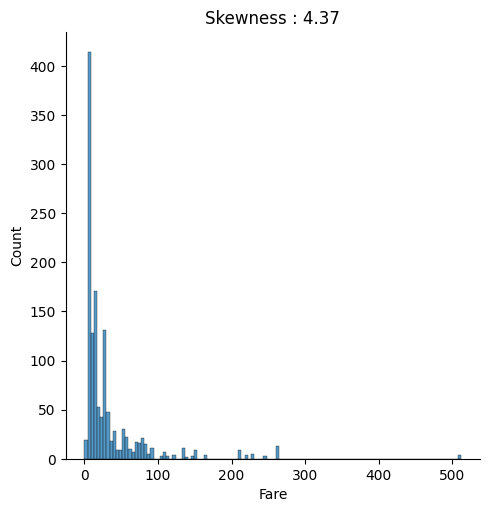

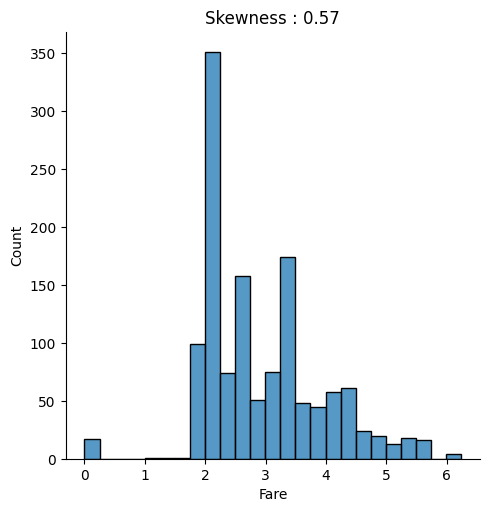

In [19]:
for feature in ['Fare']:
    
    # view the distribution of Fare after the log transformation with the skewness
    df_merge = pd.concat([train, test])
    g = sns.displot(df_merge[feature])
    plt.title("Skewness : %.2f"%(df_merge[feature].skew()))
    plt.show()
    
    train[feature] = train[feature].apply(np.log)
    test[feature] = test[feature].apply(np.log)

    # the not transformed data that contains 0
    # after the transformation we have -inf values that have to be replaced by 0
    train[feature][np.isneginf(train[feature])]=0
    test[feature][np.isneginf(test[feature])]=0

    # view the distribution of Fare after the log transformation with the skewness
    merge = pd.concat([train, test])
    g = sns.displot(merge[feature])
    plt.title("Skewness : %.2f"%(merge[feature].skew()))
    plt.show()

In [20]:
train.head() , test.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    1  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0      1      0   
 2                             Heikkinen, Miss. Laina    2  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0      1      0   
 4                           Allen, Mr. William Henry    1  35.0      0      0   
 
            Ticket      Fare  Cabin  Embarked    Prefix  TNlen  LeadingDigit  \
 0        a5 21171  1.981001    2.0         1        a5      5             2   
 1        pc 17599  4.266662    2.0         2        pc      5             1   
 2  stono2 3101282  2.070022    2.0       

In [21]:
def get_name_information(df):
    """
    extract the title, first name and last name from the name feature
    """
    df[['Last','First']] = df['Name'].str.split("," ,n=1, expand=True)
    df[['Title','First']] = df['First'].str.split(".", n=1, expand=True)

    # remove the whitespace from the title
    df['Title'] = df['Title'].str.replace(' ', '')

    return df

train = get_name_information(train)

test = get_name_information(test)

In [22]:
def rename_title(df):
    df.loc[df["Title"] == "Dr", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Rev", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Col", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Ms", "Title"] = 'Miss'
    df.loc[df["Title"] == "Major", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Mlle", "Title"] = 'Miss'
    df.loc[df["Title"] == "Mme", "Title"] = 'Mrs'
    df.loc[df["Title"] == "Jonkheer", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Lady", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "theCountess", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Capt", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Don", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Sir", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Dona", "Title"] = 'Rare Title'
    return df


In [23]:
# apply the title rename function to the training and test set
train = rename_title(train)

test = rename_title(test)

In [24]:
train.head() ,test.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    1  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0      1      0   
 2                             Heikkinen, Miss. Laina    2  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0      1      0   
 4                           Allen, Mr. William Henry    1  35.0      0      0   
 
            Ticket      Fare  Cabin  Embarked    Prefix  TNlen  LeadingDigit  \
 0        a5 21171  1.981001    2.0         1        a5      5             2   
 1        pc 17599  4.266662    2.0         2        pc      5             1   
 2  stono2 3101282  2.070022    2.0       

In [25]:
from scipy.stats import skew
def compute_skewed_features(df):
    """
    compute the skewness of all numeric features and the total number of unique values
    return only the features that have a relevant skewness
    """
    numeric_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats = pd.DataFrame(index=numeric_feats, columns=['skewness', 'unique_values'])
    skewed_feats['skewness'] = df[numeric_feats].apply(lambda x: skew(x))
    skewed_feats['unique_values'] = df.nunique()
    skewed_feats = skewed_feats[(skewed_feats['skewness'] > 1) | (skewed_feats['skewness'] < -1)]

    return skewed_feats

# combine the training and test dataset
df_merge = pd.concat([train, test])
skewed_feats = compute_skewed_features(df_merge)

skewed_feats

,skewness,unique_values
SibSp,3.839814,7
Parch,3.664872,8
Cabin,4.027587,8
LeadingDigit,1.725896,10


In [26]:
train.head() , test.head()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name  Sex   Age  SibSp  Parch  \
 0                            Braund, Mr. Owen Harris    1  22.0      1      0   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0      1      0   
 2                             Heikkinen, Miss. Laina    2  26.0      0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0      1      0   
 4                           Allen, Mr. William Henry    1  35.0      0      0   
 
            Ticket      Fare  Cabin  Embarked    Prefix  TNlen  LeadingDigit  \
 0        a5 21171  1.981001    2.0         1        a5      5             2   
 1        pc 17599  4.266662    2.0         2        pc      5             1   
 2  stono2 3101282  2.070022    2.0       

In [27]:
del train['TGroup']
del test['TGroup']
del train['Prefix']
del test['Prefix']

In [28]:
del train['First']
del test['First']
del train['Last']
del test['Last']

In [29]:
train['Age_category'].value_counts()

Age_category
adult       797
children     68
senior       26
Name: count, dtype: int64

In [30]:
train['Age_category'] = train['Age_category'].replace({'senior':1,'children': 2, 'adult':3})
test['Age_category'] = test['Age_category'].replace({'senior':1,'children': 2, 'adult': 3})

In [31]:
train['Title'].value_counts()

Title
Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: count, dtype: int64

In [32]:
train['Title'] = train['Title'].replace({'Rare Title':0,'Mr':1,'Miss': 2, 'Mrs':3,'Master':4})
test['Title'] = test['Title'].replace({'Rare Title':0,'Mr':1,'Miss': 2, 'Mrs': 3,'Master':4})

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TNlen,LeadingDigit,Age_category,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,2.0,0,6,3,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,1.945910,2.0,1,6,3,3,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,2.0,0,6,2,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,2.0,1,6,3,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,2.508582,2.0,1,7,3,3,3


In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TNlen,LeadingDigit,Age_category,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,a5 21171,1.981001,2.0,1,5,2,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,pc 17599,4.266662,2.0,2,5,1,3,3
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,stono2 3101282,2.070022,2.0,1,7,3,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,3.972177,2.0,1,6,1,3,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,2.0,1,6,3,3,1


In [35]:
train['Embarked'].value_counts()

Embarked
1    644
2    170
0     77
Name: count, dtype: int64

In [36]:
train.isnull().sum() , test.isnull().sum() , 
#dataset.head()

(PassengerId     0
 Survived        0
 Pclass          0
 Name            0
 Sex             0
 Age             0
 SibSp           0
 Parch           0
 Ticket          0
 Fare            0
 Cabin           0
 Embarked        0
 TNlen           0
 LeadingDigit    0
 Age_category    0
 Title           0
 dtype: int64,
 PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age             0
 SibSp           0
 Parch           0
 Ticket          0
 Fare            0
 Cabin           0
 Embarked        0
 TNlen           0
 LeadingDigit    0
 Age_category    0
 Title           0
 dtype: int64)

In [37]:
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

In [38]:
Features = ['Pclass','Sex' , 'Age' , 'SibSp','Parch' ,'Fare','Embarked','Cabin','Title','TNlen','LeadingDigit','Age_category']
X = train[Features]

Y = train.Survived

xtest = test[Features]

In [39]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
X_mds = mds.fit_transform(X)



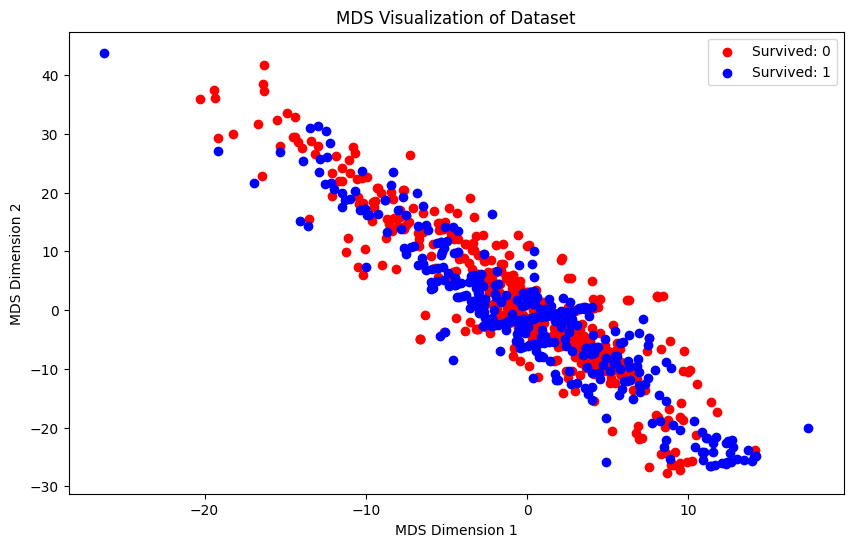

In [40]:
plt.figure(figsize=(10, 6))

colors = {0: 'red', 1: 'blue'}

for label in np.unique(Y):
    plt.scatter(
        X_mds[Y == label, 0], X_mds[Y == label, 1],
        label=f'Survived: {label}',
        c=colors[label]
    )

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Dataset')
plt.legend()
plt.show()

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


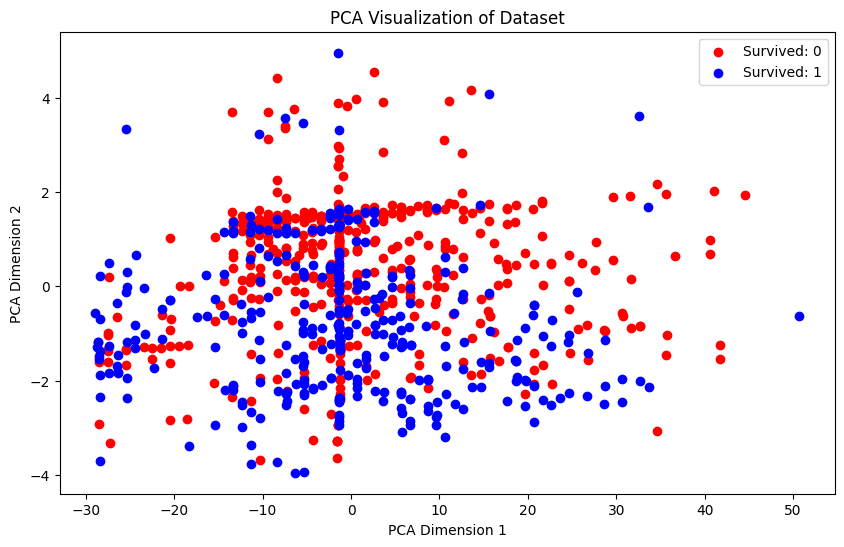

In [42]:
plt.figure(figsize=(10, 6))

colors = {0: 'red', 1: 'blue'}

for label in np.unique(Y):
    plt.scatter(
        X_pca[Y == label, 0], X_pca[Y == label, 1],
        label=f'Survived: {label}',
        c=colors[label]
    )

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA Visualization of Dataset')
plt.legend()
plt.show()

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

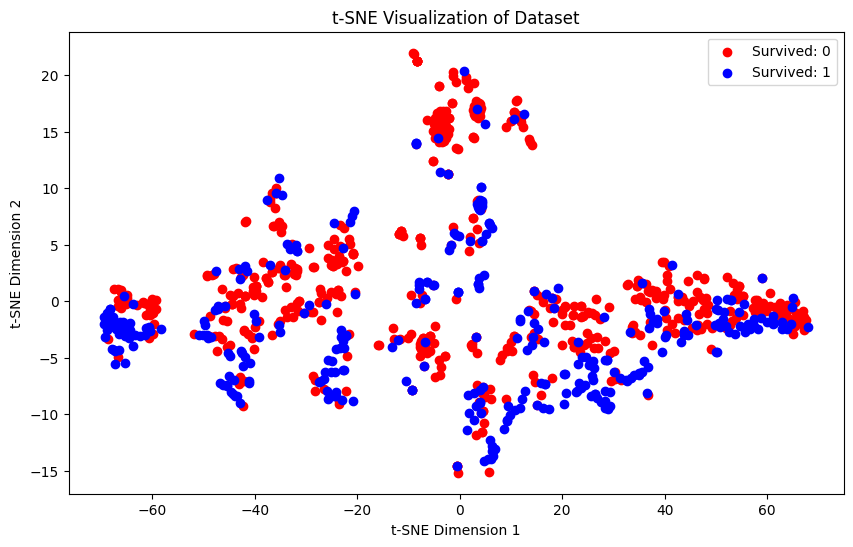

In [44]:
plt.figure(figsize=(10, 6))

colors = {0: 'red', 1: 'blue'}

for label in np.unique(Y):
    plt.scatter(
        X_tsne[Y == label, 0], X_tsne[Y == label, 1],
        label=f'Survived: {label}',
        c=colors[label]
    )

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Dataset')
plt.legend()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

X_train ,X_test , Y_train , Y_test = train_test_split(X ,Y ,train_size = 0.7 , random_state = 20)

X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

((623, 12), (623,), (268, 12), (268,))

In [46]:
model = RandomForestClassifier(bootstrap = False,
                               min_samples_split = 5, 
                               n_estimators = 100,
                               max_depth = 7,
                               max_features = 0.5, 
                               min_samples_leaf = 4,
                               criterion = 'entropy'
                              )

model.fit(X_train ,Y_train)

model_scores = cross_val_score(model, X_train, Y_train, cv=10 , scoring = "f1")

model_scores

array([0.80851064, 0.88888889, 0.80851064, 0.79166667, 0.82926829,
       0.7804878 , 0.77272727, 0.74418605, 0.79166667, 0.8       ])

In [47]:
y_pre_test = model.predict(X_test)

accuracy = f1_score(Y_test, y_pre_test)

accuracy

0.7272727272727272

In [48]:
feature_names = X.columns

In [49]:
importance = model.feature_importances_

In [50]:
print("Feature importance based on RandomForestClassifier:")
for feature, score in zip(feature_names, importance):
    print(f'{feature}: {score}')

Feature importance based on RandomForestClassifier:
Pclass: 0.13605618088880153
Sex: 0.12868531211519083
Age: 0.09145908131606474
SibSp: 0.031558111587296524
Parch: 0.012622642271221408
Fare: 0.1496665193958123
Embarked: 0.019397446447919183
Cabin: 0.012089902467636957
Title: 0.3038173846429838
TNlen: 0.03067825461201335
LeadingDigit: 0.07819480808768067
Age_category: 0.005774356167378658


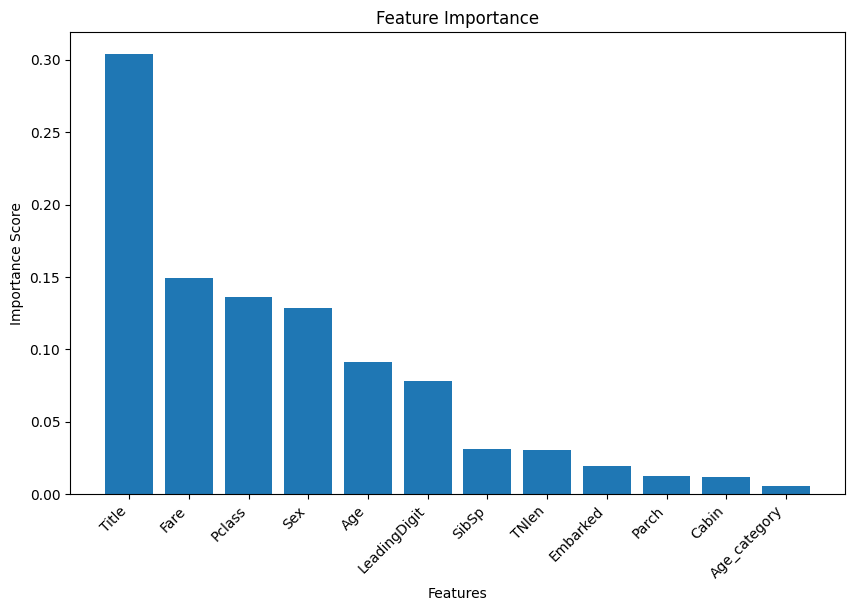

In [51]:
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [52]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Title,TNlen,LeadingDigit,Age_category
0,3,1,22.0,1,0,1.981001,1,2.0,1,5,2,3
1,1,2,38.0,1,0,4.266662,2,2.0,3,5,1,3
2,3,2,26.0,0,0,2.070022,1,2.0,2,7,3,3
3,1,2,35.0,1,0,3.972177,1,2.0,3,6,1,3
4,3,1,35.0,0,0,2.085672,1,2.0,1,6,3,3


In [53]:
y_prediction = model.predict(xtest)

In [54]:
results = pd.Series(y_prediction,name="Survived")
submission = pd.concat([pd.Series(range(892,1310),name = "PassengerID"),results],axis = 1)
submission.to_csv("submission.csv", index=False)

In [55]:
submission

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
